In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
#data = pd.read_csv("22140-0003-Data_combined_without_dublicates.csv", delimiter=",")

In [3]:
data = pd.read_csv("22140-0003-Data_combined_without_dublicates.csv", sep=None, engine='python')

In [4]:
data_new = data[["RID"
,"ID1"
,"TIETYPE"
,"testdate"
,"testdat1"
,"SAMPLE"
,"SG"
,"SG1"
,"NTYPE1"
,"FRSTTYPE"
,"FRSTTYP1"
,"RACE"
,"RACE1"
,"SEX"
,"SEX1"
,"ORIENT"
,"ORIENT1"
,"BEHAV"
,"BEHAV1"
,"AGE"
,"AGE1"
,"PRO"
,"PRO1"
,"JOHN"
,"JOHN1"
,"DEALER"
,"DEALER1"
,"THIEF"
,"THIEF1"
,"RETIRED"
,"RETIRED1"
,"HWIFE"
,"HWIFE1"
,"DISABLE"
,"DISABLE1"
,"UNEMP"
,"UNEMP1"
,"STREETS"
,"STREETS1"
,"EDUC"
,"EDUC1"
,"SYPH"
,"SYPH1"
,"HIV"
,"HIV1"
,"OCC"
,"OCC1"
,"YOB"
,"YOB1"]].copy()


## Create new columns for different connection types 1-4

In [5]:
data_expand = data_new.copy()

for t in range(1, 5):  # Assuming TIETYPE values range from 1 to 4
    data_expand[f'TIETYPE{t}'] = 0

# Set the corresponding TIETYPE column to 1 for each row's TIETYPE value
for idx, row in data_expand.iterrows():
    tietype = row['TIETYPE']
    data_expand.at[idx, f'TIETYPE{tietype}'] = 1


data_expand.head()

RID  ID1  TIETYPE     testdate     testdat1  SAMPLE  SG  SG1  NTYPE1  \
0    1  236        1  09-Mar-1990  28-Aug-1989       1   0    0       1   
1    1  236        2  09-Mar-1990  28-Aug-1989       1   0    0       1   
2    1  266        1  23-Apr-1991  24-Jan-1991       1   0   11       1   
3    1  266        2  23-Apr-1991  24-Jan-1991       1   0   11       1   
4    1  266        3  23-Apr-1991  24-Jan-1991       1   0   11       1   

   FRSTTYPE  ...  HIV  HIV1                        OCC  \
0         1  ...    0     0  FORMER EXOTIC DANCER, PRO   
1         1  ...    0     0  FORMER EXOTIC DANCER, PRO   
2         1  ...    0     0  FORMER EXOTIC DANCER, PRO   
3         1  ...    0     0  FORMER EXOTIC DANCER, PRO   
4         1  ...    0     0  FORMER EXOTIC DANCER, PRO   

                          OCC1   YOB  YOB1  TIETYPE1  TIETYPE2  TIETYPE3  \
0  ROOFER,REMODEL-HOME,EX-MAID  1964  1962         1         0         0   
1  ROOFER,REMODEL-HOME,EX-MAID  1964  1962         0         1         0   
2    NEVER WORKED IN LIFE, PRO  1964  1962         1         0         0   
3    NEVER WORKED IN LIFE, PRO  1964  1962         0         1         0   
4    NEVER WORKED IN LIFE, PRO  1964  1962         0         0         1   

  TIETYPE4  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 53 columns]

In [6]:
# First, get the unique combinations of RID and ID1
unique_combinations = data_expand.groupby(['RID', 'ID1'])
 
# Initialize the TIETYPE binary columns with 0
for t in range(1, 5):  # Assuming TIETYPE values range from 1 to 4
    data_expand[f'TIETYPE{t}'] = 0
 
# Loop through each unique combination and set the TIETYPE columns based on the values of TIETYPE
for (rid, id1), group in unique_combinations:
    types = group['TIETYPE'].unique()  # Get unique TIETYPE values for the group
    for t in types:
        if t in range(1, 5):  # Check if t is within the expected range
            data_expand.loc[(data_expand['RID'] == rid) & (data_expand['ID1'] == id1), f'TIETYPE{t}'] = 1
 
# Check the result
data_expand.drop(columns=["TIETYPE"], inplace=True)
data_expand.drop_duplicates(inplace=True)
data_expand.head()

RID  ID1     testdate     testdat1  SAMPLE  SG  SG1  NTYPE1  FRSTTYPE  \
0     1  236  09-Mar-1990  28-Aug-1989       1   0    0       1         1   
2     1  266  23-Apr-1991  24-Jan-1991       1   0   11       1         1   
5     1  283  23-Apr-1991  30-Apr-1990       1   0    0       1         1   
8     1  337  09-Mar-1990  30-Jan-1990       1   0    0       1         1   
10    1  618  23-Apr-1991  30-Apr-1990       1   0    0       1         1   

    FRSTTYP1  ...  HIV  HIV1                        OCC  \
0          3  ...    0     0  FORMER EXOTIC DANCER, PRO   
2          3  ...    0     0  FORMER EXOTIC DANCER, PRO   
5          3  ...    0     0  FORMER EXOTIC DANCER, PRO   
8          3  ...    0    -8  FORMER EXOTIC DANCER, PRO   
10         3  ...    0     0  FORMER EXOTIC DANCER, PRO   

                             OCC1   YOB  YOB1  TIETYPE1  TIETYPE2 TIETYPE3  \
0     ROOFER,REMODEL-HOME,EX-MAID  1964  1962         1         1        0   
2       NEVER WORKED IN LIFE, PRO  1964  1962         1         1        1   
5      FORMER CLERK, PRO, DDEALER  1964  1971         1         1        1   
8                             PRO  1964  1960         1         1        0   
10  FORMER CLERK,PRO,PIMP,DDEALER  1964  1964         1         1        1   

   TIETYPE4  
0         0  
2         0  
5         0  
8         0  
10        0  

[5 rows x 52 columns]

## Create seperate graphs for each connection type

In [7]:
G_1 = nx.from_pandas_edgelist(data_expand, source="RID", target="ID1", edge_attr="TIETYPE1")
G_2 = nx.from_pandas_edgelist(data_expand, source="RID", target="ID1", edge_attr="TIETYPE2")
G_3 = nx.from_pandas_edgelist(data_expand, source="RID", target="ID1", edge_attr="TIETYPE3")
G_4 = nx.from_pandas_edgelist(data_expand, source="RID", target="ID1", edge_attr="TIETYPE4")

node_attributes = {}

race_mapping = {
    -9: "OOD",
    1: "Amer Indian",
    2: "Black",
    3: "Asian/Plsle",
    4: "White",
    5: "Other",
}

education_mapping = {
    -9: "OOD",
    -8: "ID",
    -6: "Don't know",
    2: "Minimal",
    3: "Minimal",
    4: "Minimal",
    5: "Minimal",
    6: "Elementary",
    7: "Elementary",
    8: "Elementary",
    9: "Junior High",
    10: "Junior High",
    11: "Junior High",
    12: "High/GED",
    13: "Freshman Col",
    14: "Trade School",
    15: "Undergrad",
    16: "Collage Grad",
    17: "Post Grad",
    18: "Post Grad",
    19: "Post Grad",
    21: "Undefined Code",
    23: "Undefined Code",
}

HIV_mapping = {
    -9: "OOD",
    -8: "No Test",
    0: "Negative",
    1: "Positive",
}

for _, row in data_expand.iterrows():
    rid = row['RID']
    id1 = row['ID1']
    
    gay_placeholder=1 if row["SEX"] == 1 and row["SEX1"] == 1 and (G_3[rid][id1]["TIETYPE3"] or G_3[id1][rid]["TIETYPE3"]) else 0

    node_attributes[rid] = {
        "HIV_status": HIV_mapping.get(row["HIV"]),
        "Race": race_mapping.get(row["RACE"]),
        "Sex": "Male" if row["SEX"] == 1 else "Female",
        "Age": row["AGE"],
        "Education level": education_mapping.get(row["EDUC"]),
        "Syphilis_status": "Positive" if row["SYPH"] == 1 else "Negative",
        "Profession": row["OCC"],
        "gay": 1 if gay_placeholder == 1 else node_attributes.get(rid, {}).get("gay", 0)        }
    
    node_attributes[id1] = {
        "HIV_status": HIV_mapping.get(row["HIV1"]),
        "Race": race_mapping.get(row["RACE1"]),
        "Sex": "Male" if row["SEX1"] == 1 else "Female",
        "Age": row["AGE1"],
        "Education level": education_mapping.get(row["EDUC1"]),
        "Syphilis_status": "Positive" if row["SYPH1"] == 1 else "Negative",
        "Profession": row["OCC1"],
        "gay": 1 if gay_placeholder == 1 else node_attributes.get(id1, {}).get("gay", 0)
        }

nx.set_node_attributes(G_1, node_attributes)
nx.set_node_attributes(G_2, node_attributes)
nx.set_node_attributes(G_3, node_attributes)
nx.set_node_attributes(G_4, node_attributes)

### count how many nodes are gay

In [8]:
#counter code
#sum=0
#gaysum=0
#for node_id, attributes in G_1.nodes(data=True):
#    gaysum += attributes.get('gay', 0)
#    sum += 1
#print(gaysum)
#print(sum)



### Remove edges where the connection type doesn't match the graph

In [9]:
graphs = {i: globals()[f'G_{i}'] for i in range(1, 5)}  # Store reference to each graph

for i in range(1,5):
    edges_to_remove = []
    G = graphs[i]
    for u, v, attr in G.edges(data=True):
        if attr.get(f"TIETYPE{i}", 0) == 0: 
            edges_to_remove.append((u, v)) 

    for u, v in edges_to_remove:
        G.remove_edge(u, v)

## Extrapolate the probability estimates

### The 4 different connection types
1 -> Social <br>
2 -> Drugs <br>
3 -> Sexual <br>
4 -> Needle

## Create combined graph with the probabilities

In [13]:
# tG is the transmission probability of gay sex
def create_graph(t1, t2, t3, t4, tG):
    B = nx.Graph()

    transmission_probability = {1: t1, 2: t2, 3: t3, 4: t4}
    edge_pair_highest_probability = {}
    edge_tietype = {}
    seen_edges = set()

    # Iterate through each graph and update the edge attributes
    for i in range(1, 5):
        G = graphs[i]
        for u, v in G.edges():
            edge = tuple(sorted((u, v)))  # Sort the edge tuple
            
            # PRobability updatating depending on sex and other tietype connections

            # If both are mean and tietype is sex then transmission probability is tG
            if G.nodes[u].get("Sex") == "Male" and G.nodes[v].get("Sex") == "Male":
                transmission_probability[3] = tG
            # If both are not men and tietype is sex then transmission probability is t3
            elif G.nodes[u].get("Sex") != "Male" or G.nodes[v].get("Sex") != "Male":
                transmission_probability[3] = t3

            # If connection is not a sex connection, transmission probability is 0.1 of the original probability
            # Meaning socail = 0.1 of sex probability
            if edge not in graphs[3].edges():
                transmission_probability[1] = transmission_probability[3] * 0.1

            # If connection is a sex connection, transmission probability is 0 for social
            elif edge in graphs[3].edges():
                transmission_probability[1] = 0

            # Same as above but for drugs and needle
            if edge not in graphs[4].edges():
                transmission_probability[2] = transmission_probability[4] * 0.1

            elif edge in graphs[4].edges():
                transmission_probability[2] = 0

            # Exclude t1 and t2 if they are None 
            if t1 == None:
                transmission_probability[1] = 0
            if t2 == None:
                transmission_probability[2] = 0

            # Update probability using the formula
            if edge not in seen_edges:
                edge_pair_highest_probability[edge] = transmission_probability[i]
                seen_edges.add(edge)
                edge_tietype[edge] = [i]  # Initialize edge_tietype as a list
            else:
                edge_pair_highest_probability[edge] = 1 - (
                    (1 - edge_pair_highest_probability[edge]) * (1 - transmission_probability[i])
                )
                edge_tietype[edge].append(i)  # Append to the existing list

    # Convert keys and values to lists
    keys = list(edge_pair_highest_probability.keys())
    values = list(edge_pair_highest_probability.values())

    # Add edges with attributes
    for i in range(len(keys)):
        B.add_edge(
            keys[i][0],
            keys[i][1],
            probability=values[i],
            TIETYPE=edge_tietype[keys[i]],  # Add TIETYPE as a list
        )

    # Set node attributes
    nx.set_node_attributes(B, node_attributes)
    return B

# Probabilities for transmission types


### Found from: 
https://www.aidsmap.com/about-hiv/estimated-hiv-risk-exposure

In [14]:
transmission_probability = {1: 0, 2: 0, 3: 0.0008, 4: 0.0063}

# We have not decided about transmission probabilities for t1 and t2.
# Perhaps they could be copies of t3 and t4 respectively but scaled.
# Meaning a social connection could have 10% of becomming sexual etc.

## Creating the graphs with inputs as probabilities

In [35]:
# (tietype1, tietype2, tietype3, tietype4, tietype3 as gay connection)

# G_noX is meant to be the graph without tietype X where weight is set to 0
# Change it meanually as you like
# If we want to exclude tietype1 and tietype2 from the graph we set t1 and t2 to None
# For tietype3 and tietype4 we set t3 and t4 to 0.
# When setting tietype3 to 0 we also set tG to 0.

B = create_graph(0, 0, 0.008, 0.0063, 0.0138)
G_no1 = create_graph(None, 0, 0.008, 0.0063, 0.0138)
G_no2 = create_graph(0, None, 0, 0.0063, 0.0138)
G_no3 = create_graph(0, 0, 0, 0.0138, 0)
G_no4 = create_graph(0, 0, 0.0063, 0, 0.0138)

In [16]:
G_no1.edges(data=True)

EdgeDataView([(1, 236, {'probability': 0.0006300000000000194, 'TIETYPE': [1, 2]}), (1, 266, {'probability': 0.014421306000000023, 'TIETYPE': [1, 2, 3]}), (1, 283, {'probability': 0.014421306000000023, 'TIETYPE': [1, 2, 3]}), (1, 337, {'probability': 0.0006300000000000194, 'TIETYPE': [1, 2]}), (1, 618, {'probability': 0.014421306000000023, 'TIETYPE': [1, 2, 3]}), (1, 619, {'probability': 0.0006300000000000194, 'TIETYPE': [1, 2]}), (1, 880, {'probability': 0.0006300000000000194, 'TIETYPE': [1, 2]}), (1, 3453, {'probability': 0.008000000000000007, 'TIETYPE': [1, 3]}), (1, 3454, {'probability': 0.008624960000000015, 'TIETYPE': [1, 2, 3]}), (1, 3455, {'probability': 0, 'TIETYPE': [1]}), (1, 3456, {'probability': 0, 'TIETYPE': [1]}), (1, 5101, {'probability': 0, 'TIETYPE': [1]}), (1, 11740, {'probability': 0.008000000000000007, 'TIETYPE': [1, 3]}), (1, 11741, {'probability': 0.014421306000000023, 'TIETYPE': [1, 2, 3]}), (1, 12978, {'probability': 0, 'TIETYPE': [1]}), (1, 12979, {'probability

Calculate values of nodes properties

In [17]:
# Calculate metrics for each node
#degree_centrality = nx.degree_centrality(B)  # Degree Centrality
#closeness_centrality = nx.closeness_centrality(B)  # Closeness Centrality
#betweenness_centrality = nx.betweenness_centrality(B)  # Betweenness Centrality
#pagerank = nx.pagerank(B)  # PageRank

# Combine node attributes with metrics
#node_data = []
#for node in B.nodes(data=True):
#    metrics = {
#        "Node": node[0],
#        "Degree": degree_centrality[node[0]],
#        "Closeness": closeness_centrality[node[0]],
#        "Betweenness": betweenness_centrality[node[0]],
#        "PageRank": pagerank[node[0]],
#    }
#    # Combine attributes into the row
#    metrics.update(node[1])  # Add all attributes to the metrics dictionary
#    node_data.append(metrics)

# Create a DataFrame
#node_metrics = pd.DataFrame(node_data)
#node_metrics

In [18]:
#node_metrics.to_excel("target_nodes.xlsx")

In [19]:
print(graphs)

{1: <networkx.classes.graph.Graph object at 0x000002117928C790>, 2: <networkx.classes.graph.Graph object at 0x00000211794B6650>, 3: <networkx.classes.graph.Graph object at 0x000002117983DB50>, 4: <networkx.classes.graph.Graph object at 0x0000021179CD9C50>}


In [20]:
print(graphs[1].edges())

[(1, 236), (1, 266), (1, 283), (1, 337), (1, 618), (1, 619), (1, 880), (1, 3453), (1, 3454), (1, 3455), (1, 3456), (1, 5101), (1, 11740), (1, 11741), (1, 12978), (1, 12979), (1, 77), (1, 113), (1, 190), (1, 220), (1, 230), (1, 290), (1, 303), (1, 327), (1, 493), (1, 10009), (1, 10010), (1, 10011), (1, 10012), (1, 10013), (1, 10014), (1, 10015), (1, 10016), (1, 10017), (1, 10018), (1, 10019), (1, 10020), (1, 10021), (1, 10022), (1, 10023), (1, 10024), (1, 10025), (1, 10026), (1, 10027), (1, 10028), (1, 10029), (236, 5), (236, 10), (236, 40), (236, 145), (236, 147), (236, 150), (236, 155), (236, 190), (236, 202), (236, 294), (236, 337), (236, 349), (236, 1098), (236, 4208), (236, 4261), (236, 4488), (236, 5461), (236, 5643), (236, 5644), (236, 10464), (236, 10465), (236, 10466), (236, 10467), (236, 10469), (236, 10471), (236, 10472), (236, 10473), (236, 10474), (236, 10475), (236, 10476), (236, 12440), (236, 12441), (236, 13331), (236, 237), (236, 327), (236, 477), (236, 690), (236, 771)

In [21]:
# Graph with the probability attribute
#nx.write_graphml(B, "combined2.graphml")

In [36]:
# # Print all nodes in the graph
# print("Nodes in the graph:")
for node in B.nodes(data=True):  # Include data=True to show node attributes
     print(node)


(1, {'HIV_status': 'Positive', 'Race': 'Black', 'Sex': 'Male', 'Age': '45', 'Education level': 'ID', 'Syphilis_status': 'Negative', 'Profession': 'missing (out of design)', 'gay': 1})
(236, {'HIV_status': 'Negative', 'Race': 'White', 'Sex': 'Male', 'Age': '27', 'Education level': 'Trade School', 'Syphilis_status': 'Negative', 'Profession': 'ROOFER,REMODEL-HOME,EX-MAID', 'gay': 1})
(266, {'HIV_status': 'OOD', 'Race': 'Black', 'Sex': 'Male', 'Age': '26', 'Education level': 'Junior High', 'Syphilis_status': 'Negative', 'Profession': 'NEVER WORKED IN LIFE, PRO', 'gay': 1})
(283, {'HIV_status': 'Negative', 'Race': 'White', 'Sex': 'Male', 'Age': '18', 'Education level': 'Elementary', 'Syphilis_status': 'Negative', 'Profession': 'FORMER CLERK, PRO, DDEALER', 'gay': 1})
(337, {'HIV_status': 'Negative', 'Race': 'White', 'Sex': 'Male', 'Age': '28', 'Education level': 'ID', 'Syphilis_status': 'Negative', 'Profession': 'PRO', 'gay': 1})
(618, {'HIV_status': 'Negative', 'Race': 'Black', 'Sex': 'Mal

In [ ]:
# # Print all edges in the graph
# print("\nEdges in the graph:")
#for edge in B.edges(data=True):  # Include data=True to show edge attributes
#     print(edge)

(1, 236, {'probability': 0.0020091306000000753, 'TIETYPE': [1, 2]})
(1, 266, {'probability': 0.014421306000000023, 'TIETYPE': [1, 2, 3]})
(1, 283, {'probability': 0.014421306000000023, 'TIETYPE': [1, 2, 3]})
(1, 337, {'probability': 0.0020091306000000753, 'TIETYPE': [1, 2]})
(1, 618, {'probability': 0.014421306000000023, 'TIETYPE': [1, 2, 3]})
(1, 619, {'probability': 0.0014294960000000856, 'TIETYPE': [1, 2]})
(1, 880, {'probability': 0.0014294960000000856, 'TIETYPE': [1, 2]})
(1, 3453, {'probability': 0.008000000000000007, 'TIETYPE': [1, 3]})
(1, 3454, {'probability': 0.008624960000000015, 'TIETYPE': [1, 2, 3]})
(1, 3455, {'probability': 0.0008, 'TIETYPE': [1]})
(1, 3456, {'probability': 0.0008, 'TIETYPE': [1]})
(1, 5101, {'probability': 0.0008, 'TIETYPE': [1]})
(1, 11740, {'probability': 0.008000000000000007, 'TIETYPE': [1, 3]})
(1, 11741, {'probability': 0.014421306000000023, 'TIETYPE': [1, 2, 3]})
(1, 12978, {'probability': 0.0013800000000000002, 'TIETYPE': [1]})
(1, 12979, {'proba

In [ ]:
import networkx as nx

# Create a new graph to store filtered edges
B_filtered = nx.Graph()

# Iterate through all edges in the original graph B
for u, v, data in B.edges(data=True):
    # Get the tie types from the edge data
    tie_types = data['TIETYPE']
    
    # Determine the highest tie_type
    highest_tie_type = max(tie_types)
    
    # Add the edge to the new graph with the highest tie_type
    B_filtered.add_edge(
        u, v,
        probability=data['probability'],  # Retain the original probability
        TIETYPE=highest_tie_type       # Keep only the highest tie_type
    )

# Copy node attributes from the original graph B
node_attributes = {node: data for node, data in B.nodes(data=True)}
nx.set_node_attributes(B_filtered, node_attributes)

# Print the filtered edges to verify
#for edge in B_filtered.edges(data=True):
#    print(edge)

(1, 236, {'probability': 0.0020091306000000753, 'TIETYPE': 2})
(1, 266, {'probability': 0.014421306000000023, 'TIETYPE': 3})
(1, 283, {'probability': 0.014421306000000023, 'TIETYPE': 3})
(1, 337, {'probability': 0.0020091306000000753, 'TIETYPE': 2})
(1, 618, {'probability': 0.014421306000000023, 'TIETYPE': 3})
(1, 619, {'probability': 0.0014294960000000856, 'TIETYPE': 2})
(1, 880, {'probability': 0.0014294960000000856, 'TIETYPE': 2})
(1, 3453, {'probability': 0.008000000000000007, 'TIETYPE': 3})
(1, 3454, {'probability': 0.008624960000000015, 'TIETYPE': 3})
(1, 3455, {'probability': 0.0008, 'TIETYPE': 1})
(1, 3456, {'probability': 0.0008, 'TIETYPE': 1})
(1, 5101, {'probability': 0.0008, 'TIETYPE': 1})
(1, 11740, {'probability': 0.008000000000000007, 'TIETYPE': 3})
(1, 11741, {'probability': 0.014421306000000023, 'TIETYPE': 3})
(1, 12978, {'probability': 0.0013800000000000002, 'TIETYPE': 1})
(1, 12979, {'probability': 0.0013800000000000002, 'TIETYPE': 1})
(1, 77, {'probability': 0.01442

Calculate graph properties

In [39]:
import networkx as nx

# Function to compute main properties of the entire graph
def compute_graph_properties(graph):
    # Size of the graph (number of nodes)
    graph_size = graph.number_of_nodes()
    
    gcc_nodes = max(nx.connected_components(graph), key=len)
    gcc = graph.subgraph(gcc_nodes)  # Subgraph of the GCC
    
    # Size of the GCC (number of nodes)
    gcc_size = gcc.number_of_nodes()
    
    # Diameter of the GCC (only for connected graphs)
    try:
        gcc_diameter = nx.diameter(gcc)
    except nx.NetworkXError:
        gcc_diameter = "Not computable (graph not fully connected)"
    # Average degree of nodes in the graph
    avg_degree = sum(dict(graph.degree()).values()) / graph_size if graph_size > 0 else 0

    # Calculate the average degree for each tie_type
    tie_type_degrees = {}
    for u, v, data in graph.edges(data=True):
        for tie_type in data['TIETYPE']:
            if tie_type not in tie_type_degrees:
                tie_type_degrees[tie_type] = []
            tie_type_degrees[tie_type].append(graph.degree(u))
            tie_type_degrees[tie_type].append(graph.degree(v))
    
    # Calculate average degree for each tie_type
    avg_degree_per_tie_type = {
        tie_type: sum(degrees) / len(degrees)
        for tie_type, degrees in tie_type_degrees.items()
    }

    # Return properties as a dictionary
    return {
        "Size of the graph": graph_size,
        "Size of GCC": gcc_size,
        "Diameter of GCC": gcc_diameter,
        "Average degree": avg_degree,
        "Average degree per tie_type": avg_degree_per_tie_type,
    }



# Compute properties of the entire filtered graph
properties = compute_graph_properties(B)



In [40]:
import pprint as pp
pp.pprint(properties)

{'Average degree': 2.5203162346019488,
 'Average degree per tie_type': {1: 12.850025966317975,
                                 2: 14.159351895548214,
                                 3: 14.275007694675285,
                                 4: 9.010660980810234},
 'Diameter of GCC': 17,
 'Size of GCC': 8081,
 'Size of the graph': 10878}


In [41]:
import networkx as nx

# Function to compute main properties of the entire graph
def compute_graph_properties(graph):
    # Size of the graph (number of nodes)
    graph_size = graph.number_of_nodes()
    
    gcc_nodes = max(nx.connected_components(graph), key=len)
    gcc = graph.subgraph(gcc_nodes)  # Subgraph of the GCC
    
    # Size of the GCC (number of nodes)
    gcc_size = gcc.number_of_nodes()
    
    # Diameter of the GCC (only for connected graphs)
    try:
        gcc_diameter = nx.diameter(gcc)
    except nx.NetworkXError:
        gcc_diameter = "Not computable (graph not fully connected)"
    
    # Average degree of nodes in the graph
    avg_degree = sum(dict(graph.degree()).values()) / graph_size if graph_size > 0 else 0

    # Density of the graph
    density = nx.density(graph)

    # Average clustering coefficient
    avg_clustering = nx.average_clustering(graph)

    # Degree distribution
    degree_distribution = dict(graph.degree())
    
    # Number of connected components
    num_connected_components = nx.number_connected_components(graph)

    # Edge weight distribution (if weights are defined)
    edge_weights = [data.get('weight', 1) for _, _, data in graph.edges(data=True)]
    avg_edge_weight = sum(edge_weights) / len(edge_weights) if edge_weights else 0

    # Compute tie-type-specific properties
    tie_type_degrees = {}
    for u, v, data in graph.edges(data=True):
        for tie_type in data.get('TIETYPE', []):
            if tie_type not in tie_type_degrees:
                tie_type_degrees[tie_type] = []
            tie_type_degrees[tie_type].append(graph.degree(u))
            tie_type_degrees[tie_type].append(graph.degree(v))
    
    # Average degree per tie type
    avg_degree_per_tie_type = {
        tie_type: sum(degrees) / len(degrees) for tie_type, degrees in tie_type_degrees.items()
    }

    # Properties for each tie-type-specific subgraph
    tie_type_properties = {}
    for tie_type in tie_type_degrees.keys():
        subgraph = graph.edge_subgraph(
            [(u, v) for u, v, data in graph.edges(data=True) if tie_type in data.get('TIETYPE', [])]
        )
        tie_type_properties[tie_type] = {
            "Size of subgraph": subgraph.number_of_nodes(),
            "Density": nx.density(subgraph),
            "Average clustering coefficient": nx.average_clustering(subgraph),
            "Number of connected components": nx.number_connected_components(subgraph),
        }
    
    # Return all properties
    return {
        "Size of the graph": graph_size,
        "Size of GCC": gcc_size,
        "Diameter of GCC": gcc_diameter,
        "Average degree": avg_degree,
        "Density": density,
        "Average clustering coefficient": avg_clustering,
        "Degree distribution": degree_distribution,
        "Number of connected components": num_connected_components,
        "Average edge weight": avg_edge_weight,
        "Average degree per tie_type": avg_degree_per_tie_type,
        "Tie-type-specific properties": tie_type_properties,
    }


# Compute properties of the graph
properties = compute_graph_properties(B)

# Print the computed properties
for key, value in properties.items():
    print(f"{key}: {value}")


Size of the graph: 10878
Size of GCC: 8081
Diameter of GCC: 17
Average degree: 2.5203162346019488
Density: 0.00023171060353056438
Average clustering coefficient: 0.034839600005624465
Degree distribution: {1: 47, 236: 39, 266: 33, 283: 41, 337: 24, 618: 34, 619: 1, 880: 2, 3453: 1, 3454: 1, 3455: 1, 3456: 1, 5101: 1, 11740: 2, 11741: 2, 12978: 2, 12979: 2, 77: 56, 113: 12, 190: 18, 220: 11, 230: 33, 290: 32, 303: 27, 327: 16, 493: 23, 10009: 15, 10010: 6, 10011: 5, 10012: 16, 10013: 12, 10014: 23, 10015: 16, 10016: 6, 10017: 4, 10018: 10, 10019: 6, 10020: 9, 10021: 1, 10022: 10, 10023: 6, 10024: 13, 10025: 3, 10026: 1, 10027: 12, 10028: 16, 10029: 11, 5: 38, 10: 48, 40: 63, 145: 67, 147: 41, 150: 22, 155: 41, 202: 28, 294: 19, 349: 4, 1098: 1, 4208: 1, 4261: 2, 4488: 1, 5461: 1, 5643: 1, 5644: 1, 10464: 2, 10465: 2, 10466: 1, 10467: 2, 10469: 2, 10471: 2, 10472: 2, 10473: 2, 10474: 2, 10475: 2, 10476: 1, 12440: 1, 12441: 1, 13331: 1, 237: 17, 477: 16, 690: 14, 771: 13, 16: 52, 21: 51, 2

In [42]:
import pprint as pp
pp.pprint(properties)

{'Average clustering coefficient': 0.034839600005624465,
 'Average degree': 2.5203162346019488,
 'Average degree per tie_type': {1: 12.850025966317975,
                                 2: 14.159351895548214,
                                 3: 14.275007694675285,
                                 4: 9.010660980810234},
 'Average edge weight': 1.0,
 'Degree distribution': {0: 2,
                         1: 47,
                         2: 27,
                         3: 6,
                         4: 39,
                         5: 38,
                         6: 31,
                         7: 5,
                         8: 16,
                         9: 54,
                         10: 48,
                         11: 14,
                         12: 16,
                         13: 53,
                         14: 28,
                         15: 16,
                         16: 52,
                         17: 34,
                         18: 17,
                         19: 30,
    

In [25]:
nx.write_graphml(G_1, "G_1.graphml")
nx.write_graphml(G_2, "G_2.graphml")
nx.write_graphml(G_3, "G_3.graphml")
nx.write_graphml(G_4, "G_4.graphml")
nx.write_graphml(B_filtered, "B_filtered.graphml")

Main properties of the networks

Properties for G_1 after removing nodes with degree 0:
  Node count: 10734
  Edge count: 13477
  Average degree: 2.5110862679336687
  Density: 0.00023395940258396242
  Average clustering coefficient: 0.03399794205026417



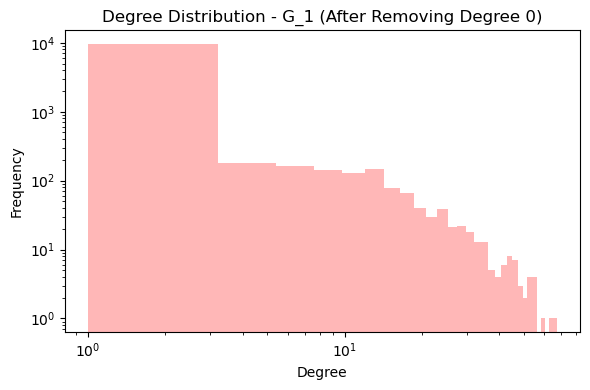

Properties for G_2 after removing nodes with degree 0:
  Node count: 5287
  Edge count: 6355
  Average degree: 2.4040098354454322
  Density: 0.00045478808843084226
  Average clustering coefficient: 0.03541647319974693



Properties for G_3 after removing nodes with degree 0:
  Node count: 3149
  Edge count: 3247
  Average degree: 2.0622419815814546
  Density: 0.0006550959280754303
  Average clustering coefficient: 0.022163908709307557



Properties for G_4 after removing nodes with degree 0:
  Node count: 402
  Edge count: 469
  Average degree: 2.3333333333333335
  Density: 0.005818786367414797
  Average clustering coefficient: 0.14746718346994994



     Node count  Edge count  Average degree   Density  \
G_1     10734.0     13477.0        2.511086  0.000234   
G_2      5287.0      6355.0        2.404010  0.000455   
G_3      3149.0      3247.0        2.062242  0.000655   
G_4       402.0       469.0        2.333333  0.005819   

     Average clustering coefficient  
G_1                        0.033998  
G_2                        0.035416  
G_3                        0.022164  
G_4                        0.147467  


In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of graphs and their names
graphs = [("G_1", G_1), ("G_2", G_2), ("G_3", G_3), ("G_4", G_4)]
graph_properties = {}

# Colors for degree distribution plots
colors = ['#FF9999', '#99CCFF', '#66FF66', '#FFCC99']

# Loop through each graph to remove nodes with degree 0, calculate properties, and plot degree distribution
for i, (graph_name, G) in enumerate(graphs):
    # Remove nodes with degree 0
    nodes_to_remove = [node for node, degree in dict(G.degree()).items() if degree == 0]
    G.remove_nodes_from(nodes_to_remove)
    
    # Calculate graph properties after removing nodes with degree 0
    properties = {
        "Node count": G.number_of_nodes(),
        "Edge count": G.number_of_edges(),
        "Average degree": sum(dict(G.degree()).values()) / G.number_of_nodes() if G.number_of_nodes() > 0 else 0,
        "Density": nx.density(G),
    }
    
    # Calculate clustering coefficient if the graph is not a multigraph
    if not isinstance(G, nx.MultiGraph):
        properties["Average clustering coefficient"] = nx.average_clustering(G)
    
    # Store properties for this graph
    graph_properties[graph_name] = properties
    
    # Print properties for each graph
    print(f"Properties for {graph_name} after removing nodes with degree 0:")
    for key, value in properties.items():
        print(f"  {key}: {value}")
    print()
    
    # Degree distribution
    degrees = [d for n, d in G.degree()]
    
    # Plot degree distribution
    plt.figure(figsize=(6, 4))
    plt.hist(degrees, bins=30, color=colors[i % len(colors)], alpha=0.7, log=True)
    plt.title(f'Degree Distribution - {graph_name} (After Removing Degree 0)')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.xscale('log')
    plt.tight_layout()
    plt.show()

# Convert the graph properties to a DataFrame
properties_df = pd.DataFrame(graph_properties).transpose()
print(properties_df)

# Optionally, save the properties DataFrame to a CSV file
properties_df.to_csv('graph_properties.csv', index=True)

SI model for the base case

In [43]:
initial_infected = [
    node for node, attrs in B.nodes(data=True) 
    if attrs.get('HIV_status', '').lower() == 'positive'
]
#print(initial_infected)

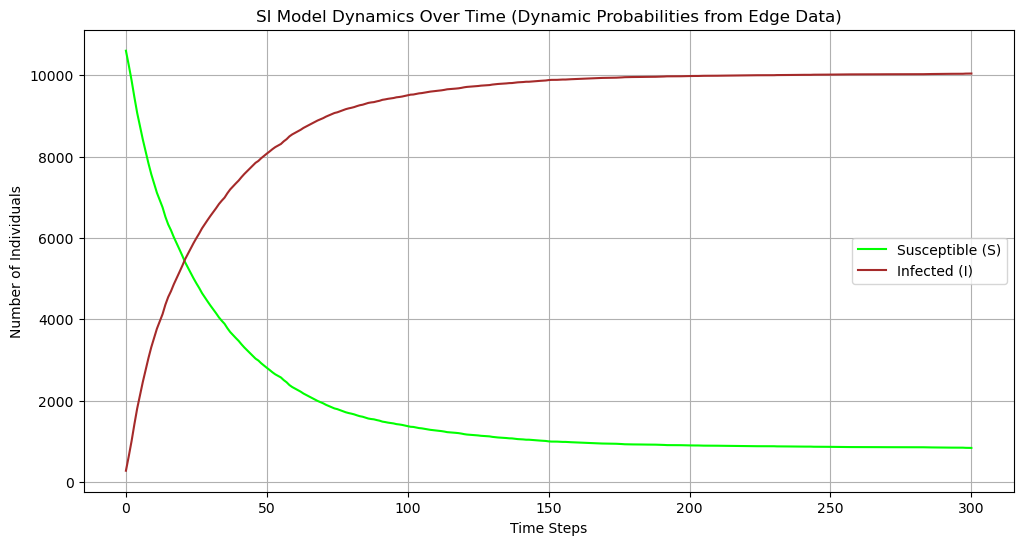

In [75]:
#Important

def si_model_updated(G, initial_infected, steps=15, step_size=30):
    """
    SI model with dynamic probabilities using edge probabilities and cumulative interactions.

    Parameters:
    G: networkx.Graph
        The multilayer graph with 'probability' attributes on edges.
    initial_infected: list
        List of initially infected nodes.
    steps: int
        Number of time steps.
    step_size: int
        Number of days per step (e.g., 30 days = 1 month).

    Returns:
    susceptible_counts, infected_counts: lists
        Counts of susceptible and infected individuals at each time step.
    """
    # Initialize states
    infected = set(initial_infected)
    susceptible = set(G.nodes()) - infected

    # Track counts
    susceptible_counts = [len(susceptible)]
    infected_counts = [len(infected)]

    # Interaction rates per day (for dynamic calculation)
    per_day = 1


    for step in range(steps):
        # Calculate cumulative interaction multipliers
        per_stepsize = step_size * per_day

        # Dynamic probabilities for the current time step
        new_infected = set()

        for node in infected:
            for neighbor in G.neighbors(node):
                if neighbor in susceptible:
                    # Get edge data
                    edge_data = G.get_edge_data(node, neighbor)
                    base_probability = edge_data.get('probability', 0)  # Use edge 'probability'

                    # Adjust probability based on interaction type
                    #tietypes = edge_data.get('TIETYPE', [])
                    dynamic_beta = base_probability  # Default to the given probability

                    
                    dynamic_beta = 1 - (1 - base_probability) ** per_stepsize

                    # Infection attempt
                    if np.random.rand() < dynamic_beta:
                        new_infected.add(neighbor)

        # Update states
        infected |= new_infected
        susceptible -= new_infected

        # Track counts
        susceptible_counts.append(len(susceptible))
        infected_counts.append(len(infected))

    return susceptible_counts, infected_counts

# Parameters
steps = 300
step_size = 30  # 1 month = 30 days

# Initial infected nodes
initial_infected = [
    node for node, attrs in B.nodes(data=True)
    if attrs.get('HIV_status', '').lower() == 'positive'
]

# Run the SI model
susceptible_counts, infected_counts = si_model_updated(
    B, initial_infected, steps, step_size
)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(steps + 1), susceptible_counts, label="Susceptible (S)", color="lime")
plt.plot(range(steps + 1), infected_counts, label="Infected (I)", color="brown")
plt.xlabel("Time Steps")
plt.ylabel("Number of Individuals")
plt.title("SI Model Dynamics Over Time (Dynamic Probabilities from Edge Data)")
plt.legend()
plt.grid()
plt.show()


SIV model

In [ ]:
# # Step 3: Get degrees of only HIV-infected nodes
# infected_node_degrees = {node: B.degree(node) for node in initial_infected}

# # Sort infected nodes by degree in descending order
# sorted_infected_nodes = sorted(infected_node_degrees.items(), key=lambda x: x[1], reverse=True)

# # Choose top N HIV-infected nodes to vaccinate
# top_N = 25  # Adjust this value as needed
# # Parameters
# steps = 250
# step_size = 30  # 1 month = 30 days
# vaccinated_nodes = [node for node, _ in sorted_infected_nodes[:top_N]]


In [54]:
len(non_infected_node_degrees)

10878

106


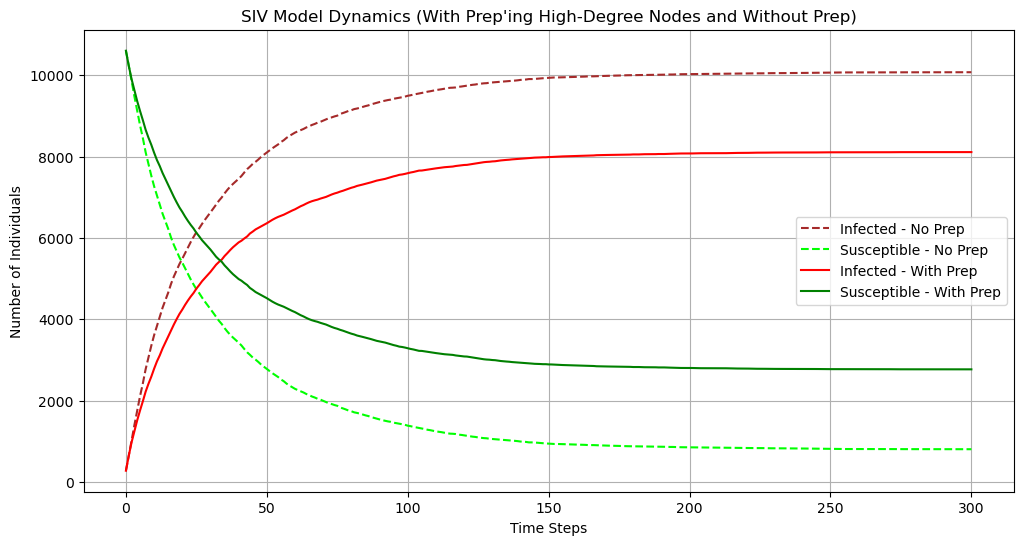

In [73]:
non_infected_node_degrees = {node: B.degree(node) for node in B.nodes() if node not in initial_infected}

sorted_non_infected_node_degrees = sorted(non_infected_node_degrees.items(), key=lambda x: x[1], reverse=True)

top_N = int(len(non_infected_node_degrees)*0.01) # Adjust this value as needed
print(top_N)
# Parameters
steps = 300
step_size = 30  # 1 month = 30 days
prep_nodes = [node for node, _ in sorted_non_infected_node_degrees[:top_N]]

# Prep the selected nodes (set edge probabilities to 0 for their connections)
B_prep = B.copy() 
for node in prep_nodes:
    for neighbor in list(B.neighbors(node)):
        B_prep[node][neighbor]["probability"] = 0

#Run the SI model with Prep and without
susceptible_counts_vax, infected_counts_vax = si_model_updated(B_prep, initial_infected, steps, step_size)
susceptible_counts_no_vax, infected_counts_no_vax = si_model_updated(B, initial_infected, steps, step_size)

# Plot the results (SIV comparison)
plt.figure(figsize=(12, 6))

# No vaccination
plt.plot(
    range(steps + 1),
    infected_counts_no_vax,
    label="Infected - No Prep",
    color="brown",
    linestyle="--",
)
plt.plot(
    range(steps + 1),
    susceptible_counts_no_vax,
    label="Susceptible - No Prep",
    color="lime",
    linestyle="--",
)

# With Prep
plt.plot(
    range(steps + 1),
    infected_counts_vax,
    label="Infected - With Prep",
    color="red",
    linestyle="-",
)
plt.plot(
    range(steps + 1),
    susceptible_counts_vax,
    label="Susceptible - With Prep",
    color="green",
    linestyle="-",
)

plt.xlabel("Time Steps")
plt.ylabel("Number of Individuals")
plt.title("SIV Model Dynamics (With Prep'ing High-Degree Nodes and Without Prep)")
plt.legend()
plt.grid()
plt.show()

In [56]:
len(non_infected_node_degrees)

10605

Randomly vaccinated

Number of not infected:  10605


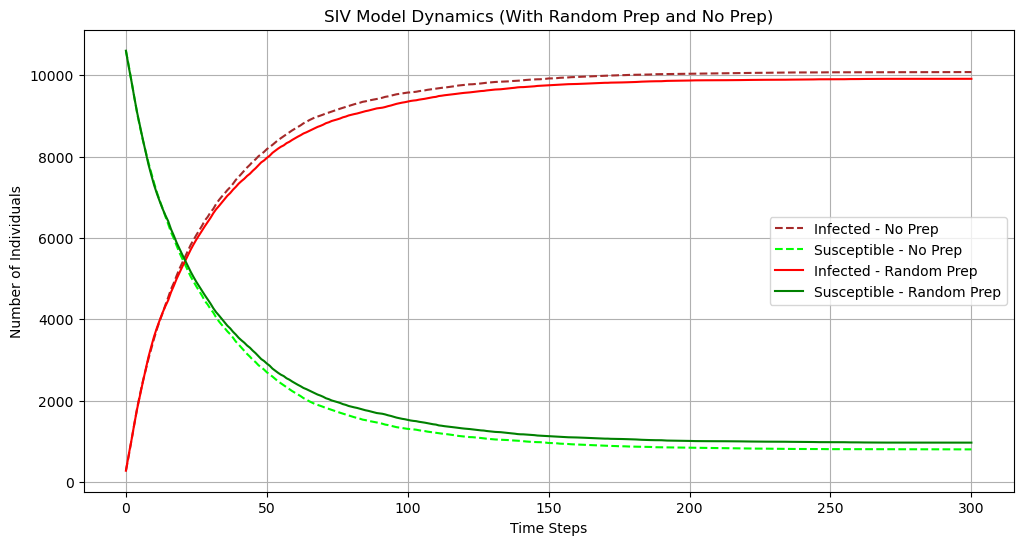

In [77]:
# Step 3: Run the SI model without Prep (original scenario)
steps = 300  # Number of time steps
step_size = 30  # 1 month = 30 days
susceptible_counts_no_vax, infected_counts_no_vax = si_model_updated(B, initial_infected, steps, step_size)

# Step 4: Randomly vaccinate 25 nodes on a copy of the graph with a fixed seed
random.seed(42)  # Set the seed for reproducibility

non_infected_nodes = [
    node for node, attrs in B.nodes(data=True)
    if attrs.get('HIV_status', '').lower() != 'positive'
]
print("Number of not infected: ", len(non_infected_nodes))
random_prep_nodes = random.sample(non_infected_nodes, top_N)

# Vaccinate the selected nodes (set edge probabilities to 0 for their connections on a copy of the graph)
B_random_prep = B.copy()

for node in random_prep_nodes:
    for neighbor in list(B_random_prep.neighbors(node)):
        B_random_prep[node][neighbor]["probability"] = 0

# Step 5: Run the SI model with random Prep
susceptible_counts_random_vax, infected_counts_random_vax = si_model_updated(
    B_random_prep, initial_infected, steps, step_size
)

# Step 6: Plot the results (SIV comparison with random Prep)
plt.figure(figsize=(12, 6))

# No Prep
plt.plot(
    range(steps + 1),
    infected_counts_no_vax,
    label="Infected - No Prep",
    color="brown",
    linestyle="--",
)
plt.plot(
    range(steps + 1),
    susceptible_counts_no_vax,
    label="Susceptible - No Prep",
    color="lime",
    linestyle="--",
)

# Random Prep
plt.plot(
    range(steps + 1),
    infected_counts_random_vax,
    label="Infected - Random Prep",
    color="red",
    linestyle="-",
)
plt.plot(
    range(steps + 1),
    susceptible_counts_random_vax,
    label="Susceptible - Random Prep",
    color="green",
    linestyle="-",
)

plt.xlabel("Time Steps")
plt.ylabel("Number of Individuals")
plt.title("SIV Model Dynamics (With Random Prep and No Prep)")
plt.legend()
plt.grid()
plt.show()

# Output the randomly vaccinated nodes for verification
#print("Randomly Vaccinated Nodes:", random_vaccinated_nodes)

[201132, 12966, 851, 200205, 10992, 4233, 488, 329, 202766, 913, 300030, 3595, 10002, 200953, 12912, 1147, 2, 10178, 3514, 728, 1892, 200998, 564, 2285, 1135, 300088, 202818, 300118, 200280, 3781, 5645, 12944, 200952, 11069, 290, 764, 401570, 40002, 890, 300083, 765, 10627, 10542, 202767, 10525, 4159, 278, 125, 11522, 200275, 1063, 10040, 10122, 672, 10354, 5558, 1002, 4267, 384, 200623, 201627, 3102, 4804, 1602, 10201, 10047, 202426, 2516, 373, 352, 41267, 10965, 400331, 400453, 3187, 202645, 5002, 12166, 4042, 2375, 10523, 3693, 202346, 10209, 100012, 300015, 10961, 582, 200486, 743, 11750, 11818, 10980, 201301, 832, 5463, 1451, 2189, 11074, 11204, 4601, 5204, 10971, 169, 11573, 4278]


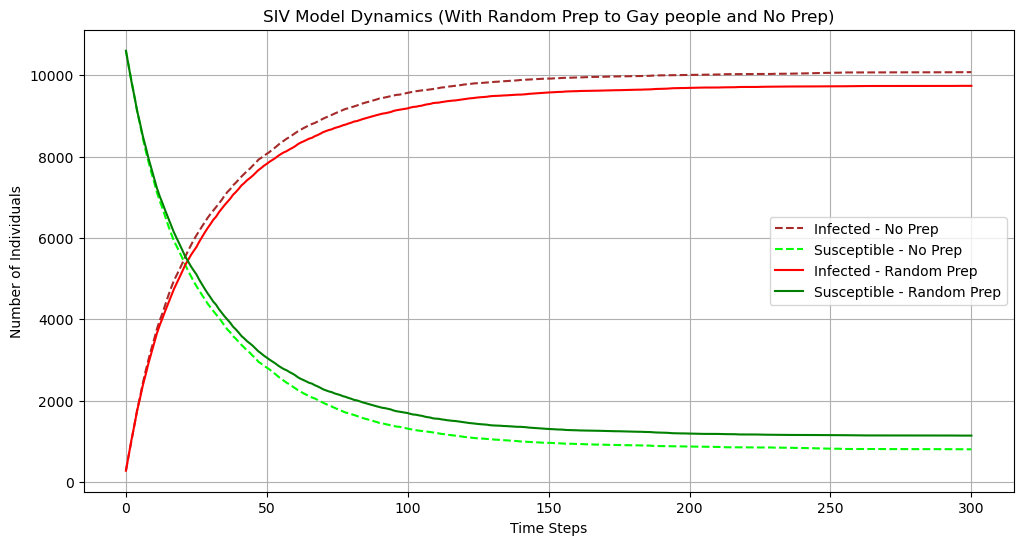

In [80]:
# Step 3: Run the SI model without Prep (original scenario)
steps = 300  # Number of time steps
step_size = 30  # 1 month = 30 days
susceptible_counts_no_vax, infected_counts_no_vax = si_model_updated(B, initial_infected, steps, step_size)

# Step 4: Randomly vaccinate 25 nodes on a copy of the graph with a fixed seed
random.seed(42)  # Set the seed for reproducibility
gay_people_without_hiv = []
for node_id, attributes in B.nodes(data=True):
    if attributes.get('HIV_status') != 'Positive' and attributes.get('gay') == 1:
        gay_people_without_hiv.append(node_id)


random_gay_prep_nodes = random.sample(gay_people_without_hiv, top_N)
print((random_gay_prep_nodes))
# Vaccinate the selected nodes (set edge probabilities to 0 for their connections on a copy of the graph)
B_random_prep_gay = B.copy()

for node in random_gay_prep_nodes:
    for neighbor in list(B_random_prep_gay.neighbors(node)):
        B_random_prep_gay[node][neighbor]["probability"] = 0

# Step 5: Run the SI model with random Prep
susceptible_counts_random_vax, infected_counts_random_vax = si_model_updated(
    B_random_prep_gay, initial_infected, steps, step_size
)

# Step 6: Plot the results (SIV comparison with random Prep)
plt.figure(figsize=(12, 6))

# No Prep
plt.plot(
    range(steps + 1),
    infected_counts_no_vax,
    label="Infected - No Prep",
    color="brown",
    linestyle="--",
)
plt.plot(
    range(steps + 1),
    susceptible_counts_no_vax,
    label="Susceptible - No Prep",
    color="lime",
    linestyle="--",
)

# Random Prep
plt.plot(
    range(steps + 1),
    infected_counts_random_vax,
    label="Infected - Random Prep",
    color="red",
    linestyle="-",
)
plt.plot(
    range(steps + 1),
    susceptible_counts_random_vax,
    label="Susceptible - Random Prep",
    color="green",
    linestyle="-",
)

plt.xlabel("Time Steps")
plt.ylabel("Number of Individuals")
plt.title("SIV Model Dynamics (With Random Prep to Gay people and No Prep)")
plt.legend()
plt.grid()
plt.show()

# Output the randomly vaccinated nodes for verification
# print("Randomly Vaccinated Nodes:", random_vaccinated_nodes)

<class 'list'>


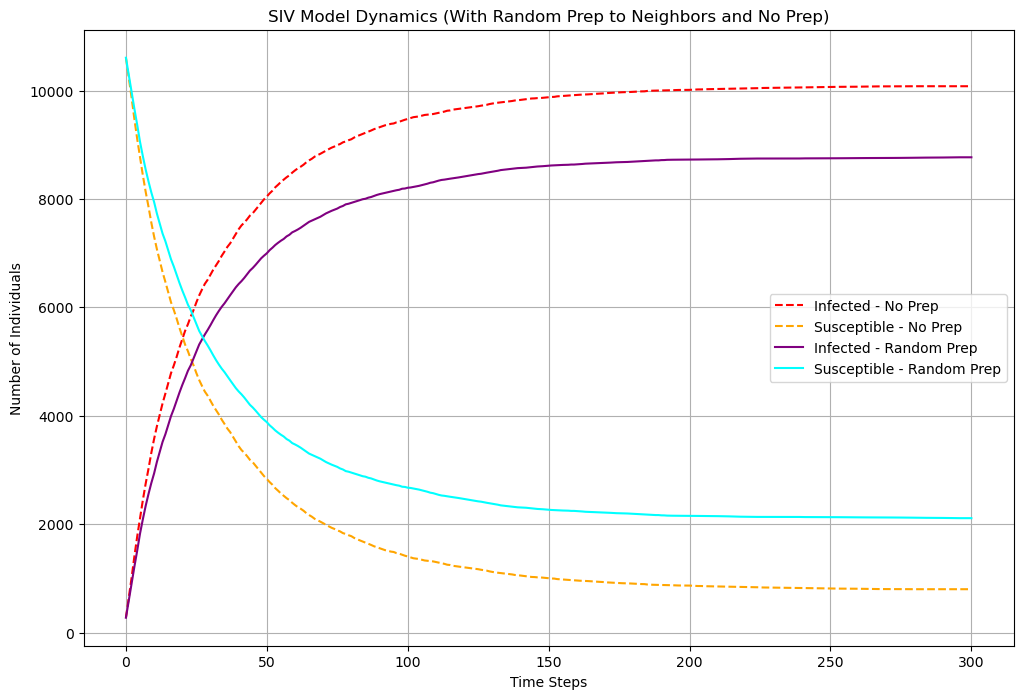

In [ ]:
# Step 3: Run the SI model without Prep (original scenario)
steps = 300  # Number of time steps
step_size = 30  # 1 month = 30 days
susceptible_counts_no_vax, infected_counts_no_vax = si_model_updated(B, initial_infected, steps, step_size)
# Change
# Step 4: Randomly vaccinate 25 nodes on a copy of the graph with a fixed seed
random.seed(42)  # Set the seed for reproducibility

x = list(B.nodes())
random_nodes = random.sample(x, top_N)
neighbors_without_hiv = []
print(type(random_nodes))

for node_id in random_nodes:
    attributes = B.nodes[node_id]
    tmp = []
    neighbors = B.neighbors(node_id)  # Get neighbors of the node

    for neighbor in neighbors:
        if attributes.get('HIV_status') != 'Positive':
            tmp.append(neighbor)  # Process the neighbor as needed
    #print(tmp)
    if len(tmp) == 0:
        continue
    else:
        k = random.sample(tmp, 1)
    neighbors_without_hiv.append(k)

neighbors_without_hiv = [item for sublist in neighbors_without_hiv for item in sublist]

    # Vaccinate the selected nodes (set edge probabilities to 0 for their connections on a copy of the graph)
B_random_neighbors = B.copy()
for node in neighbors_without_hiv:
    for neighbor in list(B_random_neighbors.neighbors(node)):
        B_random_neighbors[node][neighbor]["probability"] = 0

# Step 5: Run the SI model with random Prep
susceptible_counts_random_vax, infected_counts_random_vax = si_model_updated(
    B_random_neighbors, initial_infected, steps, step_size
)

# Step 6: Plot the results (SIV comparison with random Prep)
plt.figure(figsize=(12, 8))

# No Prep
plt.plot(
    range(steps + 1),
    infected_counts_no_vax,
    label="Infected - No Prep",
    color="red",
    linestyle="--",
)
plt.plot(
    range(steps + 1),
    susceptible_counts_no_vax,
    label="Susceptible - No Prep",
    color="orange",
    linestyle="--",
)

# Random Prep
plt.plot(
    range(steps + 1),
    infected_counts_random_vax,
    label="Infected - Random Prep",
    color="purple",
    linestyle="-",
)
plt.plot(
    range(steps + 1),
    susceptible_counts_random_vax,
    label="Susceptible - Random Prep",
    color="cyan",
    linestyle="-",
)

plt.xlabel("Time Steps")
plt.ylabel("Number of Individuals")
plt.title("SIV Model Dynamics (With Random Prep to Neighbors and No Prep)")
plt.legend()
plt.grid()
plt.show()

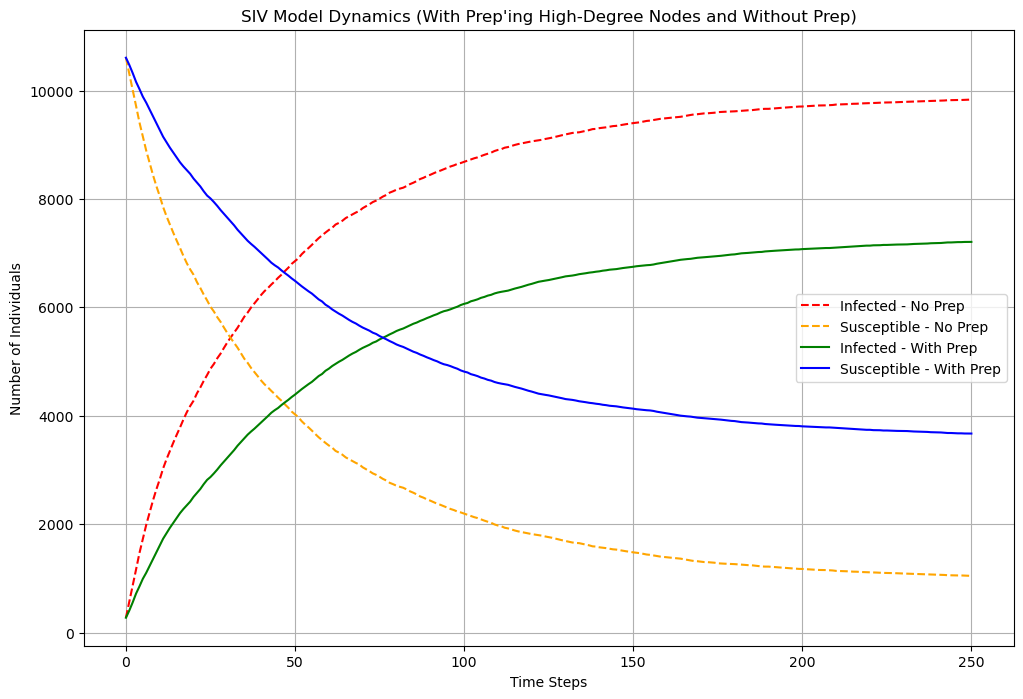

In [ ]:
non_infected_node_degrees = {node: G_no4.degree(node) for node in G_no4.nodes()}

sorted_non_infected_node_degrees = sorted(non_infected_node_degrees.items(), key=lambda x: x[1], reverse=True)

top_N = 100  # Adjust this value as needed
# Parameters
steps = 250
step_size = 30  # 1 month = 30 days
prep_nodes = [node for node, _ in sorted_non_infected_node_degrees[:top_N]]

# Prep the selected nodes (set edge probabilities to 0 for their connections)
G_no4_prep = G_no4.copy() 
for node in prep_nodes:
    for neighbor in list(G_no4.neighbors(node)):
        G_no4_prep[node][neighbor]["probability"] = 0

#Run the SI model with Prep and without
susceptible_counts_vax, infected_counts_vax = si_model_updated(G_no4_prep, initial_infected, steps, step_size)
susceptible_counts_no_vax, infected_counts_no_vax = si_model_updated(G_no4, initial_infected, steps, step_size)

# Plot the results (SIV comparison)
plt.figure(figsize=(12, 8))

# No vaccination
plt.plot(
    range(steps + 1),
    infected_counts_no_vax,
    label="Infected - No Prep",
    color="red",
    linestyle="--",
)
plt.plot(
    range(steps + 1),
    susceptible_counts_no_vax,
    label="Susceptible - No Prep",
    color="orange",
    linestyle="--",
)

# With Prep
plt.plot(
    range(steps + 1),
    infected_counts_vax,
    label="Infected - With Prep",
    color="green",
    linestyle="-",
)
plt.plot(
    range(steps + 1),
    susceptible_counts_vax,
    label="Susceptible - With Prep",
    color="blue",
    linestyle="-",
)

plt.xlabel("Time Steps")
plt.ylabel("Number of Individuals")
plt.title("SIV Model Dynamics (With Prep'ing High-Degree Nodes and Without Prep)")
plt.legend()
plt.grid()
plt.show()